In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from keras.models import Sequential
import tensorflow as tf
from keras import models
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import StratifiedKFold


In [19]:
import tensorflow as tf
devices = tf.config.list_physical_devices('GPU')
print(len(devices)) 

1


In [20]:
IMG_SIZE = 150
DIR = r"D:/untitled_project"
DATADIR = r"D:/Downloads/dataset-20221127T044932Z-001/dataset"
TEST_DIR = r"D:/testing"
CATEGORIES = ["glass", "metal", "paper", "plastic"]
# CATEGORIES_TESTING = ["cardboard","glass1","metal", "paper", "plastic"]

In [21]:
all_images_array = []
all_labels = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # path to dogs or cats dir
    label = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(
                path, img), cv2.IMREAD_COLOR)
            img_array_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            # <------------------ NEW PART!!!!
            all_images_array.append(img_array_resized)
            # <------------------ NEW PART!!!!
            all_labels.append(label)
            #plt.imshow(img_array_resized, cmap='gray')
            # plt.show()
        except Exception as e:
            pass



In [22]:
# Split the dataset into train and test sets, with percentage of splitting = 70 / 30 respectively
x_train, x_test, y_train, y_test = train_test_split(
    all_images_array, all_labels, test_size=0.20, shuffle=True, random_state=77)
    

In [23]:
# # Create StratifiedKFold object.
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  
# for train_index, test_index in skf.split(all_images_array, all_labels):
#     x_train, x_test = x_scaled[train_index], x_scaled[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [24]:
# convert x_train, x_test to numpy array

x_train = np.array(x_train).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
x_test = np.array(x_test).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train.shape

(2031, 150, 150, 3)

In [25]:
# Data normalization to convert features to the same scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [26]:
num_classes = 4
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

y_test


array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [27]:
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (2031, 150, 150, 3)
2031 train samples
508 test samples


In [29]:
idg = ImageDataGenerator(width_shift_range=0.2,
                         height_shift_range=0.2,
                         zoom_range=0.3,
                         fill_mode='nearest',
                         horizontal_flip = True,
                         rotation_range=90,

                        brightness_range=[0.2,1.0],    
                        zca_epsilon=1e-06,  # epsilon for ZCA whitening
                      


                        shear_range=0.2,  # set range for random shear  <<3<<4  0 => 0.1 => 0.2

                        channel_shift_range=0.2,  # set range for random channel shifts     <<5<<6   0.=>0.1=>0.2
                        # set mode for filling points outside the input boundaries

                        cval=0
                        )
idg.fit(x_train)

train_set = idg.flow(x_train, y_train,batch_size = 32)

In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD

import time
import random

from keras import models





In [31]:
from kerastuner.tuners import RandomSearch
from keras.callbacks import EarlyStopping


def build_model(hp):
    model = keras.Sequential()
    


    model.add(keras.layers.AveragePooling2D(6,3,input_shape=(150,150,3)))

    for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
        model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(0.2))
    for i in range(hp.Int("Conv Layers", min_value=0, max_value=5)):
        model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [32,64,128,256]), 3, activation='relu'))
    model.add(keras.layers.MaxPool2D(2,2))

    
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())

    
    model.add(keras.layers.Dense(hp.Choice("Dense layer", [16,32,64, 128, 256, 512]), activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(hp.Choice("Dense layer", [16,32,64, 128,256, 512]), activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(4, activation='softmax'))
    opt = SGD(learning_rate = 0.03)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy', metrics= ['accuracy'])
   


 
   
               

    
    
    
    
     
    
    return model
#using tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 4,
    directory = "./save_model/",
    project_name='this_model_4',
    overwrite = True
 
    
    
 
)


tuner.search(x_train,y_train , validation_data=(x_test, y_test), epochs=20, batch_size=32,callbacks=[keras.callbacks.TensorBoard("./log1/")])

    



Trial 4 Complete [00h 00m 45s]
val_accuracy: 0.5905511975288391

Best val_accuracy So Far: 0.5905511975288391
Total elapsed time: 00h 04m 31s
INFO:tensorflow:Oracle triggered exit


In [32]:
best_model = tuner.get_best_models()[0]
# best_hps=tuner.get_best_hyperparameters()[0]
# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}.
# """)

In [33]:
best_model.evaluate(x_test,y_test)

16/16 [==============================] - 1s 10ms/step - loss: 0.9901 - accuracy: 0.5906


[0.9901143312454224, 0.5905511975288391]

In [34]:
# filepath = r"D:/save_model"
best_model.save("./this_model_4/")
  # or model.save(path, save_format='tf')

checkpoint = tf.train.Checkpoint(best_model)
checkpoint.restore("./this_model_4/").expect_partial()

INFO:tensorflow:Assets written to: ./this_model_4/assets


INFO:tensorflow:Assets written to: ./this_model_4/assets


In [35]:
from tensorflow.keras.models import load_model
best_model = load_model('./this_model_4/')


In [36]:
best_model.evaluate(x_test, y_test)

16/16 [==============================] - 1s 15ms/step - loss: 0.9901 - accuracy: 0.5906


[0.9901143312454224, 0.5905511975288391]

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard('./log1/')

In [39]:
# history = best_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=7, batch_size=32,callbacks=[keras.callbacks.TensorBoard("./log/")])
history = best_model.fit_generator(train_set,steps_per_epoch = 63, validation_data=(x_test,y_test), epochs=10,callbacks=[keras.callbacks.TensorBoard("./log1/")])


C:\Users\USER\AppData\Local\Temp\ipykernel_4776\71479913.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = best_model.fit_generator(train_set,steps_per_epoch = 63, validation_data=(x_test,y_test), epochs=10,callbacks=[keras.callbacks.TensorBoard("./log1/")])


Epoch 1/10
63/63 [==============================] - 14s 212ms/step - loss: 1.3127 - accuracy: 0.3687 - val_loss: 1.0786 - val_accuracy: 0.5728
Epoch 2/10
63/63 [==============================] - 11s 173ms/step - loss: 1.2863 - accuracy: 0.3797 - val_loss: 1.0710 - val_accuracy: 0.5492
Epoch 3/10
63/63 [==============================] - 11s 177ms/step - loss: 1.2658 - accuracy: 0.4082 - val_loss: 1.0806 - val_accuracy: 0.5394
Epoch 4/10
63/63 [==============================] - 11s 180ms/step - loss: 1.2719 - accuracy: 0.3982 - val_loss: 1.0523 - val_accuracy: 0.5413
Epoch 5/10
63/63 [==============================] - 12s 182ms/step - loss: 1.2595 - accuracy: 0.3997 - val_loss: 1.0851 - val_accuracy: 0.5157
Epoch 6/10
63/63 [==============================] - 11s 181ms/step - loss: 1.2354 - accuracy: 0.4202 - val_loss: 1.1138 - val_accuracy: 0.5020
Epoch 7/10
63/63 [==============================] - 11s 181ms/step - loss: 1.2662 - accuracy: 0.3992 - val_loss: 1.0620 - val_accuracy: 0.5217

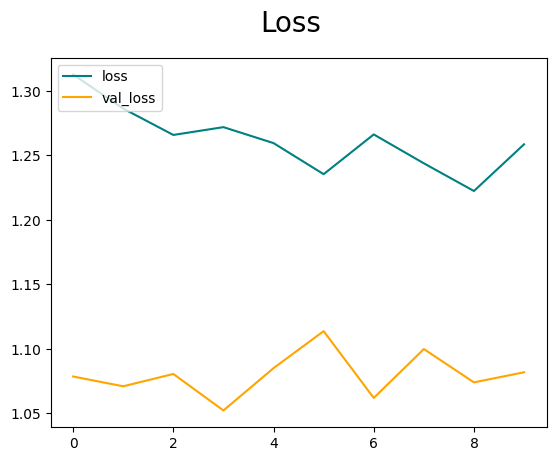

In [40]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

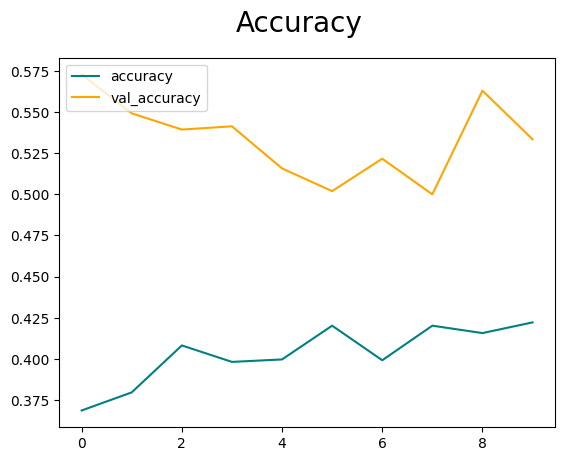

In [41]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [42]:
#Predict

from sklearn.metrics import confusion_matrix,classification_report
y_prediction = best_model.predict(x_test)
y_test = np.argmax(y_test, axis=1)
y_prediction = np.argmax(y_prediction, axis=1)


#Create confusion matrix and normalizes it over predicted (columns)

# print('Confusion Matrix')
# confusion_matrix(y_test, y_prediction)
confusion_matrix(y_test, y_prediction, normalize='pred')

# print('Classification Report')
# target_names = ['glass', 'metal', 'paper', 'plastic']
# print(classification_report(y_test, y_pred, target_names=target_names))
# matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

16/16 [==============================] - 0s 6ms/step


array([[0.75862069, 0.23611111, 0.09322034, 0.21917808],
       [0.13793103, 0.56597222, 0.12711864, 0.21917808],
       [0.        , 0.04861111, 0.47457627, 0.15068493],
       [0.10344828, 0.14930556, 0.30508475, 0.4109589 ]])

In [43]:
out_test_set = []
for category in CATEGORIES_TESTING :
    path = os.path.join(TEST_DIR, category)  # path to dogs or cats dir
    test_label = CATEGORIES_TESTING.index(category)
    for img in os.listdir(path):
        try:
            test_img_array = cv2.imread(os.path.join(
                path, img), cv2.IMREAD_COLOR)
            test_img_array_resized = cv2.resize(test_img_array, (IMG_SIZE, IMG_SIZE))
            out_test_set.append([test_img_array_resized, test_label])
        except Exception as e:
            pass

NameError: name 'CATEGORIES_TESTING' is not defined

In [ ]:
# import random

random.shuffle(out_test_set)

In [ ]:
# A few random samples
use_samples = [5, 12,13,20]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = out_test_set[sample].reshape(-1,150, 150,1)
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(out_test_set[sample])

# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)


if classes == 0:
    print("out is cardboard")
elif classes == 1:
    print("out is glass")
elif classes == 2:
    print("out is metal")
elif clasess == 3:
    print("out is paper")

else:
    print("out is plastic")


In [ ]:

# out_test_set = np.array(out_test_set, dtype=object).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
# out_test_set.shape
# out_test_set = out_test_set.astype('float32')
# # out_test_set = (out_test_set- np.mean(out_test_set)) / np.std(out_test_set)

In [ ]:
out_test_set.shape

In [ ]:
out_test_set[1].shape

In [ ]:
# for x in range(0,5):


    
#     out_test_set[1].shape
#     image = np.expand_dims(
#         (out_test_set[x] - np.mean(out_test_set)) / np.std(out_test_set), axis=0)



#     plt.imshow(out_test_set[x])
#     plt.show()


#     out = model.predict(out_test_set[x].reshape(-3, IMG_SIZE,IMG_SIZE, 3))
#     out = np.argmax(out)


#     if out == 0:
#         print("out is cardboard")
#     elif out == 1:
#         print("out is glass")
#     elif out == 2:
#         print("out is metal")
#     elif out == 3:
#         print("out is paper")

#     else:
        print("out is plastic")